# packages

In [1]:
import pandas as pd
import numpy as np
import yaml
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetAssetsRequest
from alpaca.trading.enums import AssetClass, AssetStatus
from alpaca.data.historical import CryptoHistoricalDataClient, StockHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime
import yfinance as yf
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# list of cryptos

In [2]:
keys = yaml.safe_load(open('../keys.yaml', 'r'))

In [3]:
trading_client = TradingClient(keys['paper_key'], keys['paper_secret'])

In [4]:
search_params = GetAssetsRequest(asset_class = AssetClass.CRYPTO, status = AssetStatus.ACTIVE)
crypto_assets = trading_client.get_all_assets(search_params)
len(crypto_assets), crypto_assets[0]

(56,
 {   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
     'attributes': [],
     'easy_to_borrow': False,
     'exchange': <AssetExchange.CRYPTO: 'CRYPTO'>,
     'fractionable': True,
     'id': UUID('8588af33-3a8e-4a09-bb6c-ba4226dc7aff'),
     'maintenance_margin_requirement': 100.0,
     'marginable': False,
     'min_order_size': 0.010821339,
     'min_trade_increment': 1e-09,
     'name': 'Aave / US Dollar',
     'price_increment': 0.01,
     'shortable': False,
     'status': <AssetStatus.ACTIVE: 'active'>,
     'symbol': 'AAVE/USD',
     'tradable': True})

In [5]:
df_crypto_assets = pd.DataFrame([dict(asset) for asset in crypto_assets])
df_crypto_assets.head()

,id,asset_class,exchange,symbol,name,status,tradable,marginable,shortable,easy_to_borrow,fractionable,min_order_size,min_trade_increment,price_increment,maintenance_margin_requirement,attributes
0,8588af33-3a8e-4a09-bb6c-ba4226dc7aff,AssetClass.CRYPTO,AssetExchange.CRYPTO,AAVE/USD,Aave / US Dollar,AssetStatus.ACTIVE,True,False,False,False,True,0.010821,1.000000e-09,0.0100,100.0,[]
1,73adad68-0e0e-45cb-9bcc-66135068cb4d,AssetClass.CRYPTO,AssetExchange.CRYPTO,AAVE/USDC,Aave / USD Coin,AssetStatus.ACTIVE,True,False,False,False,True,0.011782,1.000000e-09,NaN,100.0,[]
2,dfb6d1da-427c-42b6-864d-f227af29e2e9,AssetClass.CRYPTO,AssetExchange.CRYPTO,AAVE/USDT,Aave / USD Tether,AssetStatus.ACTIVE,True,False,False,False,True,0.010976,1.000000e-09,0.0100,100.0,[]
3,0515189d-1933-4a94-89ce-4e9a24356d58,AssetClass.CRYPTO,AssetExchange.CRYPTO,AVAX/USD,Avalanche / US Dollar,AssetStatus.ACTIVE,True,False,False,False,True,0.029356,1.000000e-09,0.0005,100.0,[]
4,b7b73bc2-e3bc-4b37-8fcf-4eac793027ef,AssetClass.CRYPTO,AssetExchange.CRYPTO,AVAX/USDC,Avalanche / USD Coin,AssetStatus.ACTIVE,True,False,False,False,True,0.029227,1.000000e-09,NaN,100.0,[]


In [6]:
df_crypto_assets['id'] = df_crypto_assets['id'].astype('str')

# cryptos data

## from alpaca

In [7]:
client = CryptoHistoricalDataClient()

# Creating request object
request_params = CryptoBarsRequest(
                        symbol_or_symbols=df_crypto_assets['symbol'].tolist(),
                        timeframe=TimeFrame.Day,
                        start=datetime(2000, 1, 1),
                        end=datetime.now()
                        )

In [8]:
crypto_bars = client.get_crypto_bars(request_params)

df_crypto = crypto_bars.df
df_crypto

open         high          low  \
symbol    timestamp                                                          
AAVE/USDC 2023-08-18 05:00:00+00:00    55.943866    56.478969    54.992050   
          2023-08-19 05:00:00+00:00    55.947874    57.099034    55.560846   
          2023-08-20 05:00:00+00:00    56.335100    57.579500    56.290500   
          2023-08-21 05:00:00+00:00    57.032000    57.545000    54.970500   
          2023-08-22 05:00:00+00:00    55.075200    55.735350    52.795000   
...                                          ...          ...          ...   
YFI/USD   2024-01-24 06:00:00+00:00  6895.170000  7183.443000  6849.115000   
          2024-01-25 06:00:00+00:00  6992.084000  7106.140000  6892.165000   
          2024-01-26 06:00:00+00:00  7096.096000  7327.482000  7014.611000   
          2024-01-27 06:00:00+00:00  7238.486500  7373.150000  7168.380500   
          2024-01-28 06:00:00+00:00  7331.255000  7342.746000  7271.743500   

                                           close  volume  trade_count  vwap  
symbol    timestamp                                                          
AAVE/USDC 2023-08-18 05:00:00+00:00    55.944857     0.0          0.0   0.0  
          2023-08-19 05:00:00+00:00    56.500850     0.0          0.0   0.0  
          2023-08-20 05:00:00+00:00    56.988250     0.0          0.0   0.0  
          2023-08-21 05:00:00+00:00    55.066550     0.0          0.0   0.0  
          2023-08-22 05:00:00+00:00    55.654250     0.0          0.0   0.0  
...                                          ...     ...          ...   ...  
YFI/USD   2024-01-24 06:00:00+00:00  6982.220000     0.0          0.0   0.0  
          2024-01-25 06:00:00+00:00  7086.056500     0.0          0.0   0.0  
          2024-01-26 06:00:00+00:00  7237.406500     0.0          0.0   0.0  
          2024-01-27 06:00:00+00:00  7334.880500     0.0          0.0   0.0  
          2024-01-28 06:00:00+00:00  7304.810000     0.0          0.0   0.0  

[36693 rows x 7 columns]

In [9]:
df_crypto.reset_index().dropna().groupby('symbol').agg({'timestamp':['min', 'max', 'count']})

timestamp                                
                                 min                       max count
symbol                                                              
AAVE/USD   2021-07-15 05:00:00+00:00 2024-01-28 06:00:00+00:00   928
AAVE/USDC  2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
AAVE/USDT  2021-07-15 05:00:00+00:00 2024-01-28 06:00:00+00:00   922
AVAX/USD   2021-11-18 06:00:00+00:00 2024-01-28 06:00:00+00:00   802
AVAX/USDC  2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
AVAX/USDT  2021-11-18 06:00:00+00:00 2024-01-28 06:00:00+00:00   796
BAT/USD    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
BAT/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
BCH/BTC    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1085
BCH/USD    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
BCH/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
BCH/USDT   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1117
BTC/USD    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
BTC/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
BTC/USDT   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
CRV/USD    2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
CRV/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
DOGE/USD   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
DOGE/USDC  2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
DOGE/USDT  2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1117
DOT/USD    2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
DOT/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
ETH/BTC    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
ETH/USD    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
ETH/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
ETH/USDT   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
GRT/USD    2021-07-15 05:00:00+00:00 2024-01-28 06:00:00+00:00   928
GRT/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
LINK/BTC   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1090
LINK/USD   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
LINK/USDC  2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
LINK/USDT  2022-01-13 06:00:00+00:00 2024-01-28 06:00:00+00:00   700
LTC/BTC    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1112
LTC/USD    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
LTC/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
LTC/USDT   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1117
MKR/USD    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
MKR/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
SHIB/USD   2023-03-14 05:00:00+00:00 2024-01-28 06:00:00+00:00   321
SHIB/USDC  2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
SHIB/USDT  2021-09-15 05:00:00+00:00 2024-01-28 06:00:00+00:00   863
SUSHI/USD  2021-07-23 05:00:00+00:00 2024-01-28 06:00:00+00:00   920
SUSHI/USDC 2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
SUSHI/USDT 2022-01-20 06:00:00+00:00 2024-01-28 06:00:00+00:00   735
UNI/BTC    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1084
UNI/USD    2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
UNI/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
UNI/USDT   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1117
USDC/USD   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
USDT/USD   2021-01-01 06:00:00+00:00 2024-01-28 06:00:00+00:00  1123
USDT/USDC  2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
XTZ/USD    2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
XTZ/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
YFI/USD    2021-12-02 06:00:00+00:00 2024-01-28 06:00:00+00:00   788
YFI/USDC   2023-08-18 05:00:00+00:00 2024-01-28 06:00:00+00:00   164
YFI/USDT   2021-12-02 06:

## from yfinance

In [10]:
instruments = df_crypto.index.get_level_values(0).tolist()
instruments = [instrument.replace('/', '-') for instrument in instruments]
df_crypto_yf = yf.download(instruments, start = '2000-01-01')
df_crypto_yf

[*********************100%%**********************]  56 of 56 completed

32 Failed downloads:
['UNI-BTC', 'UNI-USDC', 'AAVE-USDC', 'DOT-USDC', 'YFI-USDC', 'SHIB-USDT', 'AAVE-USDT', 'AVAX-USDT', 'BCH-USDC', 'DOGE-USDC', 'YFI-USDT', 'USDT-USDC', 'BAT-USDC', 'XTZ-USDC', 'SUSHI-USDC', 'MKR-USDC', 'SUSHI-USDT', 'LTC-USDC', 'BTC-USDC', 'UNI-USDT', 'SHIB-USDC', 'AVAX-USDC', 'ETH-USDC', 'DOGE-USDT', 'BTC-USDT', 'BCH-USDT', 'LTC-USDT', 'LINK-USDT', 'LINK-USDC', 'GRT-USDC', 'CRV-USDC', 'ETH-USDT']: Exception('%ticker%: No timezone found, symbol may be delisted')


Adj Close                                                     \
             AAVE-USD AAVE-USDC AAVE-USDT   AVAX-USD AVAX-USDC AVAX-USDT   
Date                                                                       
2014-09-17        NaN       NaN       NaN        NaN       NaN       NaN   
2014-09-18        NaN       NaN       NaN        NaN       NaN       NaN   
2014-09-19        NaN       NaN       NaN        NaN       NaN       NaN   
2014-09-20        NaN       NaN       NaN        NaN       NaN       NaN   
2014-09-21        NaN       NaN       NaN        NaN       NaN       NaN   
...               ...       ...       ...        ...       ...       ...   
2024-01-24  89.916786       NaN       NaN  31.217867       NaN       NaN   
2024-01-25  88.773170       NaN       NaN  30.480639       NaN       NaN   
2024-01-26  91.374542       NaN       NaN  32.279819       NaN       NaN   
2024-01-27  91.593391       NaN       NaN  33.261963       NaN       NaN   
2024-01-28  92.362419       NaN       NaN  36.272789       NaN       NaN   

                                                     ...   Volume           \
             BAT-USD BAT-USDC   BCH-BTC     BCH-USD  ... UNI-USDC UNI-USDT   
Date                                                 ...                     
2014-09-17       NaN      NaN       NaN         NaN  ...      NaN      NaN   
2014-09-18       NaN      NaN       NaN         NaN  ...      NaN      NaN   
2014-09-19       NaN      NaN       NaN         NaN  ...      NaN      NaN   
2014-09-20       NaN      NaN       NaN         NaN  ...      NaN      NaN   
2014-09-21       NaN      NaN       NaN         NaN  ...      NaN      NaN   
...              ...      ...       ...         ...  ...      ...      ...   
2024-01-24  0.215732      NaN  0.005756  236.379364  ...      NaN      NaN   
2024-01-25  0.219188      NaN  0.005898  236.786331  ...      NaN      NaN   
2024-01-26  0.225244      NaN  0.005929  242.011108  ...      NaN      NaN   
2024-01-27  0.230618      NaN  0.005788  243.791214  ...      NaN      NaN   
2024-01-28  0.230371      NaN  0.005711  243.260223  ...      NaN      NaN   

                                                                       \
                USDC-USD      USDT-USD USDT-USDC     XTZ-USD XTZ-USDC   
Date                                                                    
2014-09-17           NaN           NaN       NaN         NaN      NaN   
2014-09-18           NaN           NaN       NaN         NaN      NaN   
2014-09-19           NaN           NaN       NaN         NaN      NaN   
2014-09-20           NaN           NaN       NaN         NaN      NaN   
2014-09-21           NaN           NaN       NaN         NaN      NaN   
...                  ...           ...       ...         ...      ...   
2024-01-24  5.374965e+09  3.844062e+10       NaN  24768191.0      NaN   
2024-01-25  4.814403e+09  3.371615e+10       NaN  21878662.0      NaN   
2024-01-26  5.487182e+09  4.209143e+10       NaN  20878570.0      NaN   
2024-01-27  2.863545e+09  2.323256e+10       NaN  18922990.0      NaN   
2024-01-28  3.437372e+09  2.579052e+10       NaN  18912256.0      NaN   

                                          
               YFI-USD YFI-USDC YFI-USDT  
Date                                      
2014-09-17         NaN      NaN      NaN  
2014-09-18         NaN      NaN      NaN  
2014-09-19         NaN      NaN      NaN  
2014-09-20         NaN      NaN      NaN  
2014-09-21         NaN      NaN      NaN  
...                ...      ...      ...  
2024-01-24  17464379.0      NaN      NaN  
2024-01-25  13902204.0      NaN      NaN  
2024-01-26  15316337.0      NaN      NaN  
2024-01-27  11624275.0      NaN      NaN  
2024-01-28  11342856.0      NaN      NaN  

[3421 rows x 336 columns]

In [11]:
lvl1_values = list(set(df_crypto_yf.columns.get_level_values(1).tolist()))
lvl0_values = ['Close']

combinations = list(itertools.product(lvl0_values, lvl1_values))
combinations

df_close = df_crypto_yf[combinations].droplevel(0, axis = 1).reset_index()
df_close_melted = df_close.melt(id_vars = 'Date', value_name='Close').dropna().reset_index(drop = True)
df_close_melted


,Date,variable,Close
0,2017-11-09,USDT-USD,1.008180
1,2017-11-10,USDT-USD,1.006010
2,2017-11-11,USDT-USD,1.008990
3,2017-11-12,USDT-USD,1.012470
4,2017-11-13,USDT-USD,1.009350
...,...,...,...
48113,2022-03-28,GRT-USD,0.432750
48114,2022-03-29,GRT-USD,0.487945
48115,2022-03-30,GRT-USD,0.481189
48116,2022-03-31,GRT-USD,0.478123


In [12]:
df_crypto_yf_dates = df_close_melted.groupby('variable').agg({'Date':['min', 'max', 'count']})
df_crypto_yf_dates

Date                 
                 min        max count
variable                             
AAVE-USD  2020-10-02 2024-01-28  1214
AVAX-USD  2020-07-13 2024-01-28  1226
BAT-USD   2017-11-09 2024-01-28  2272
BCH-BTC   2017-11-10 2024-01-28  2269
BCH-USD   2017-11-09 2024-01-28  2272
BTC-USD   2014-09-17 2024-01-28  3421
CRV-USD   2020-08-14 2024-01-28  1263
DOGE-USD  2017-11-09 2024-01-28  2272
DOT-USD   2020-08-20 2024-01-28  1257
ETH-BTC   2017-11-10 2024-01-28  2269
ETH-USD   2017-11-09 2024-01-28  2272
GRT-USD   2020-06-19 2022-04-01   652
LINK-BTC  2017-11-10 2024-01-28  2269
LINK-USD  2017-11-09 2024-01-28  2272
LTC-BTC   2014-09-17 2024-01-28  3420
LTC-USD   2014-09-17 2024-01-28  3421
MKR-USD   2017-11-20 2024-01-28  2261
SHIB-USD  2020-08-01 2024-01-28  1235
SUSHI-USD 2020-08-28 2024-01-28  1249
UNI-USD   2019-10-21 2024-01-28  1561
USDC-USD  2018-10-08 2024-01-28  1939
USDT-USD  2017-11-09 2024-01-28  2272
XTZ-USD   2017-11-09 2024-01-28  2272
YFI-USD   2020-07-20 2024-01-28  1288

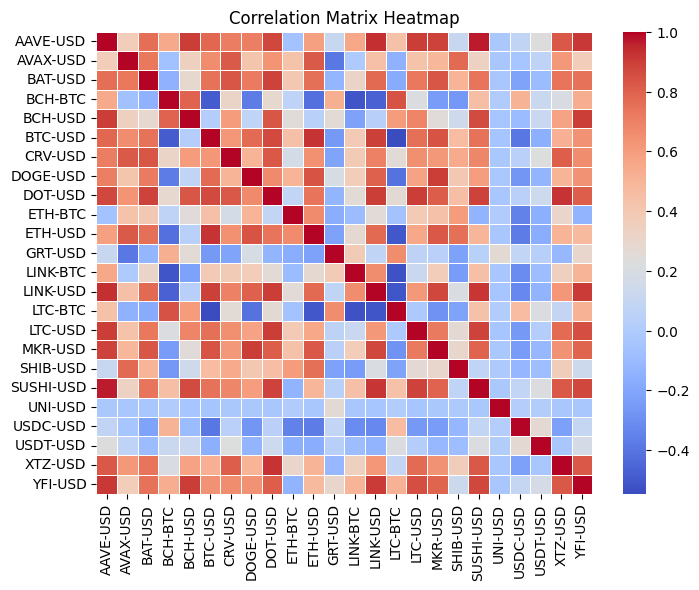

In [13]:
df_corr = df_close[df_crypto_yf_dates.index.tolist()].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [14]:
df_corr['BTC-USD'].sort_values()

LTC-BTC     -0.546266
BCH-BTC     -0.488633
USDC-USD    -0.393242
GRT-USD     -0.262363
USDT-USD    -0.164768
UNI-USD     -0.046702
BCH-USD      0.016772
LINK-BTC     0.384223
ETH-BTC      0.440644
SHIB-USD     0.465714
XTZ-USD      0.519917
CRV-USD      0.620904
YFI-USD      0.638420
AVAX-USD     0.657761
SUSHI-USD    0.751096
BAT-USD      0.751982
LTC-USD      0.752702
DOGE-USD     0.772437
AAVE-USD     0.782930
MKR-USD      0.839731
DOT-USD      0.869960
LINK-USD     0.891302
ETH-USD      0.924795
BTC-USD      1.000000
Name: BTC-USD, dtype: float64

In [15]:
curencies = ['BTC-USD', 'LTC-BTC', 'USDT-USD']
df_corr.loc[curencies, curencies]

,BTC-USD,LTC-BTC,USDT-USD
BTC-USD,1.000000,-0.546266,-0.164768
LTC-BTC,-0.546266,1.000000,0.214420
USDT-USD,-0.164768,0.214420,1.000000


In [16]:
curencies = ['BTC-USD', 'LTC-BTC', 'UNI-USD', 'BCH-USD']
df_corr.loc[curencies, curencies]

,BTC-USD,LTC-BTC,UNI-USD,BCH-USD
BTC-USD,1.000000,-0.546266,-0.046702,0.016772
LTC-BTC,-0.546266,1.000000,0.004590,0.605118
UNI-USD,-0.046702,0.004590,1.000000,-0.040171
BCH-USD,0.016772,0.605118,-0.040171,1.000000


In [17]:
curencies = ['BTC-USD', 'LTC-BTC', 'UNI-USD', 'LINK-BTC']
df_corr.loc[curencies, curencies]

,BTC-USD,LTC-BTC,UNI-USD,LINK-BTC
BTC-USD,1.000000,-0.546266,-0.046702,0.384223
LTC-BTC,-0.546266,1.000000,0.004590,-0.527298
UNI-USD,-0.046702,0.004590,1.000000,-0.027026
LINK-BTC,0.384223,-0.527298,-0.027026,1.000000
